# T-test 2sample

두 개의 그룹을 비교한다는 것은 굉장히 어려운 일이다.            
이유는 두 그룹의 분산이 같아야 정확한 결과를 유추할 수 있기 떄문이다

In [1]:
import pandas as pd
import pca
import numpy as np
D=pd.read_csv("C:/Users/SAMSUNG/Desktop/공부파일들/excel/kaggle/smoking_driking_dataset_Ver01.csv")
data=pd.DataFrame(D)

### 샘플

In [2]:
import sklearn.model_selection as skmod

In [3]:
sample,_=skmod.train_test_split(data,train_size=100,random_state=10)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
sample.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,47.05000,161.750000,63.750000,81.484000,0.92200,0.922000,1.040000,1.020000,121.880000,76.240000,...,58.180000,109.220000,123.800000,13.858000,1.060000,0.834000,24.810000,23.80000,29.930000,1.500000
std,13.76379,9.111404,13.472287,10.774659,0.34424,0.336824,0.196946,0.140705,13.893011,8.678454,...,16.515301,33.358045,104.794363,1.546464,0.277798,0.223028,10.196746,16.58221,25.266361,0.797724
min,20.00000,145.000000,45.000000,63.200000,0.10000,0.100000,1.000000,1.000000,96.000000,55.000000,...,29.000000,49.000000,30.000000,7.300000,1.000000,0.500000,9.000000,6.00000,7.000000,1.000000
25%,35.00000,155.000000,55.000000,71.900000,0.80000,0.700000,1.000000,1.000000,113.000000,70.000000,...,46.750000,88.500000,65.750000,12.975000,1.000000,0.700000,19.000000,14.00000,14.000000,1.000000
50%,45.00000,160.000000,60.000000,82.000000,0.90000,1.000000,1.000000,1.000000,120.500000,77.500000,...,56.000000,108.000000,96.500000,13.900000,1.000000,0.800000,22.000000,19.50000,22.000000,1.000000
75%,55.00000,170.000000,70.000000,88.175000,1.20000,1.200000,1.000000,1.000000,130.000000,81.000000,...,65.000000,126.250000,150.500000,14.825000,1.000000,1.000000,28.000000,26.50000,34.250000,2.000000
max,80.00000,185.000000,110.000000,110.000000,2.00000,2.000000,2.000000,2.000000,172.000000,96.000000,...,119.000000,279.000000,813.000000,17.600000,3.000000,1.800000,76.000000,122.00000,183.000000,3.000000


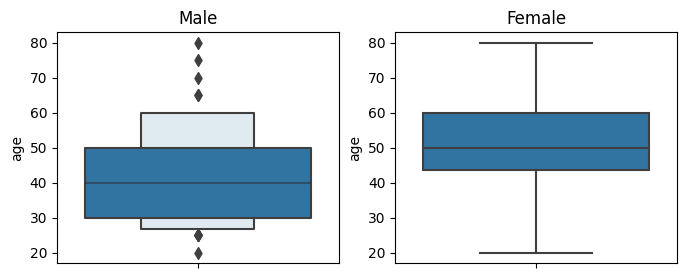

In [6]:
_,a=plt.subplots(1,2,figsize=(8,3))
sb.boxenplot(data=sample[sample["sex"]=="Male"],y='age',ax=a[0])
a[0].set_title("Male")
sb.boxplot(data=sample[sample["sex"]=='Female'],y='age',ax=a[1])
a[1].set_title("Female")
plt.show()

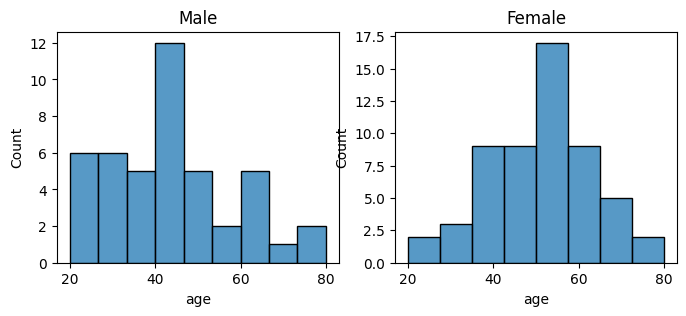

In [7]:
_,a=plt.subplots(1,2,figsize=(8,3))
sb.histplot(data=sample[sample["sex"]=="Male"],x='age',bins=9,ax=a[0])
a[0].set_title("Male")
sb.histplot(data=sample[sample["sex"]=='Female'],x='age',ax=a[1])
a[1].set_title("Female")
plt.show()

### 정규성 확인

In [12]:
import numpy as np
import scipy.stats as sps

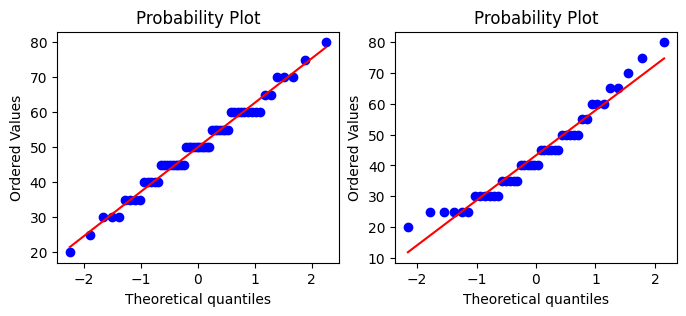

In [21]:
_,a=plt.subplots(1,2,figsize=(8,3))
sps.probplot(sample[sample["sex"]=="Male"]["age"],dist='norm',plot=a[1])
sps.probplot(sample[sample["sex"]=="Female"]["age"],dist='norm',plot=a[0])
plt.show()

In [22]:
sps.shapiro(sample[sample["sex"]=="Male"]["age"])

ShapiroResult(statistic=0.9520542621612549, pvalue=0.0656244084239006)

In [23]:
sps.shapiro(sample[sample["sex"]=="Female"]["age"])

ShapiroResult(statistic=0.984012246131897, pvalue=0.6626017689704895)

위의 결과 둘다 정규성을 따름을 알 수 있다

#### 샤피로 윌크 검정(참고)
Shapiro-Wilk 검정의 결과를 해석할 때, 두 가지 주요 값인 검정 통계량(statistic)과 p-value를 고려해야 합니다.

검정 통계량(statistic):
검정 통계량은 0과 1 사이의 값을 가지며, 1에 가까울수록 데이터가 정규 분포에 가깝다는 것을 나타냅니다. 여기서 검정 통계량은 0.952로, 1에 가깝다는 것을 나타냅니다. 따라서 이 결과로 봤을 때, 데이터가 정규 분포에 상당히 가깝다고 볼 수 있습니다.

p-value:
p-value는 검정의 유의수준과 관련이 있습니다. 주어진 데이터가 정규 분포를 따른다고 가정하고, Shapiro-Wilk 검정을 수행한 결과에서 나온 p-value는 해당 가설의 유의성을 나타냅니다. 일반적으로 0.05(5%) 유의수준을 사용합니다.

### 등분산성

In [25]:
sps.bartlett(sample[sample["sex"]=="Male"]["age"],sample[sample["sex"]=="Female"]["age"])

BartlettResult(statistic=1.0610962013153415, pvalue=0.302965299982866)

위의 결과를 보아 그룹간 분산의 차이가 없다고 판단

## T-test

In [27]:
sps.ttest_ind(sample[sample["sex"]=="Male"]["age"],sample[sample["sex"]=="Female"]["age"],equal_var=True)

Ttest_indResult(statistic=-2.480077935771487, pvalue=0.014840744930575992)

위의 결과 두 그룹간 평균차이가 표본에서 우연히 발생했을 확률이 낮다.
따라서 모집단의 평균차이가 있을 가능성이 있음

In [28]:
sample[sample["sex"]=="Male"]["age"].mean()

43.29545454545455

In [29]:
sample[sample["sex"]=="Female"]["age"].mean()

50.0

In [30]:
sps.ttest_ind(sample[sample["sex"]=="Male"]["age"],sample[sample["sex"]=="Female"]["age"],equal_var=False)

Ttest_indResult(statistic=-2.4361642419796534, pvalue=0.016927610686705705)

### ANOVA

In [31]:
sps.f_oneway(sample[sample["sex"]=="Male"]["age"],sample[sample["sex"]=="Female"]["age"])

F_onewayResult(statistic=6.150786567500565, pvalue=0.014840744930575923)